# Linear Regression

In [6]:
# import house data
import pandas as pd
df = pd.read_csv('housing.data',header=None,sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'];

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


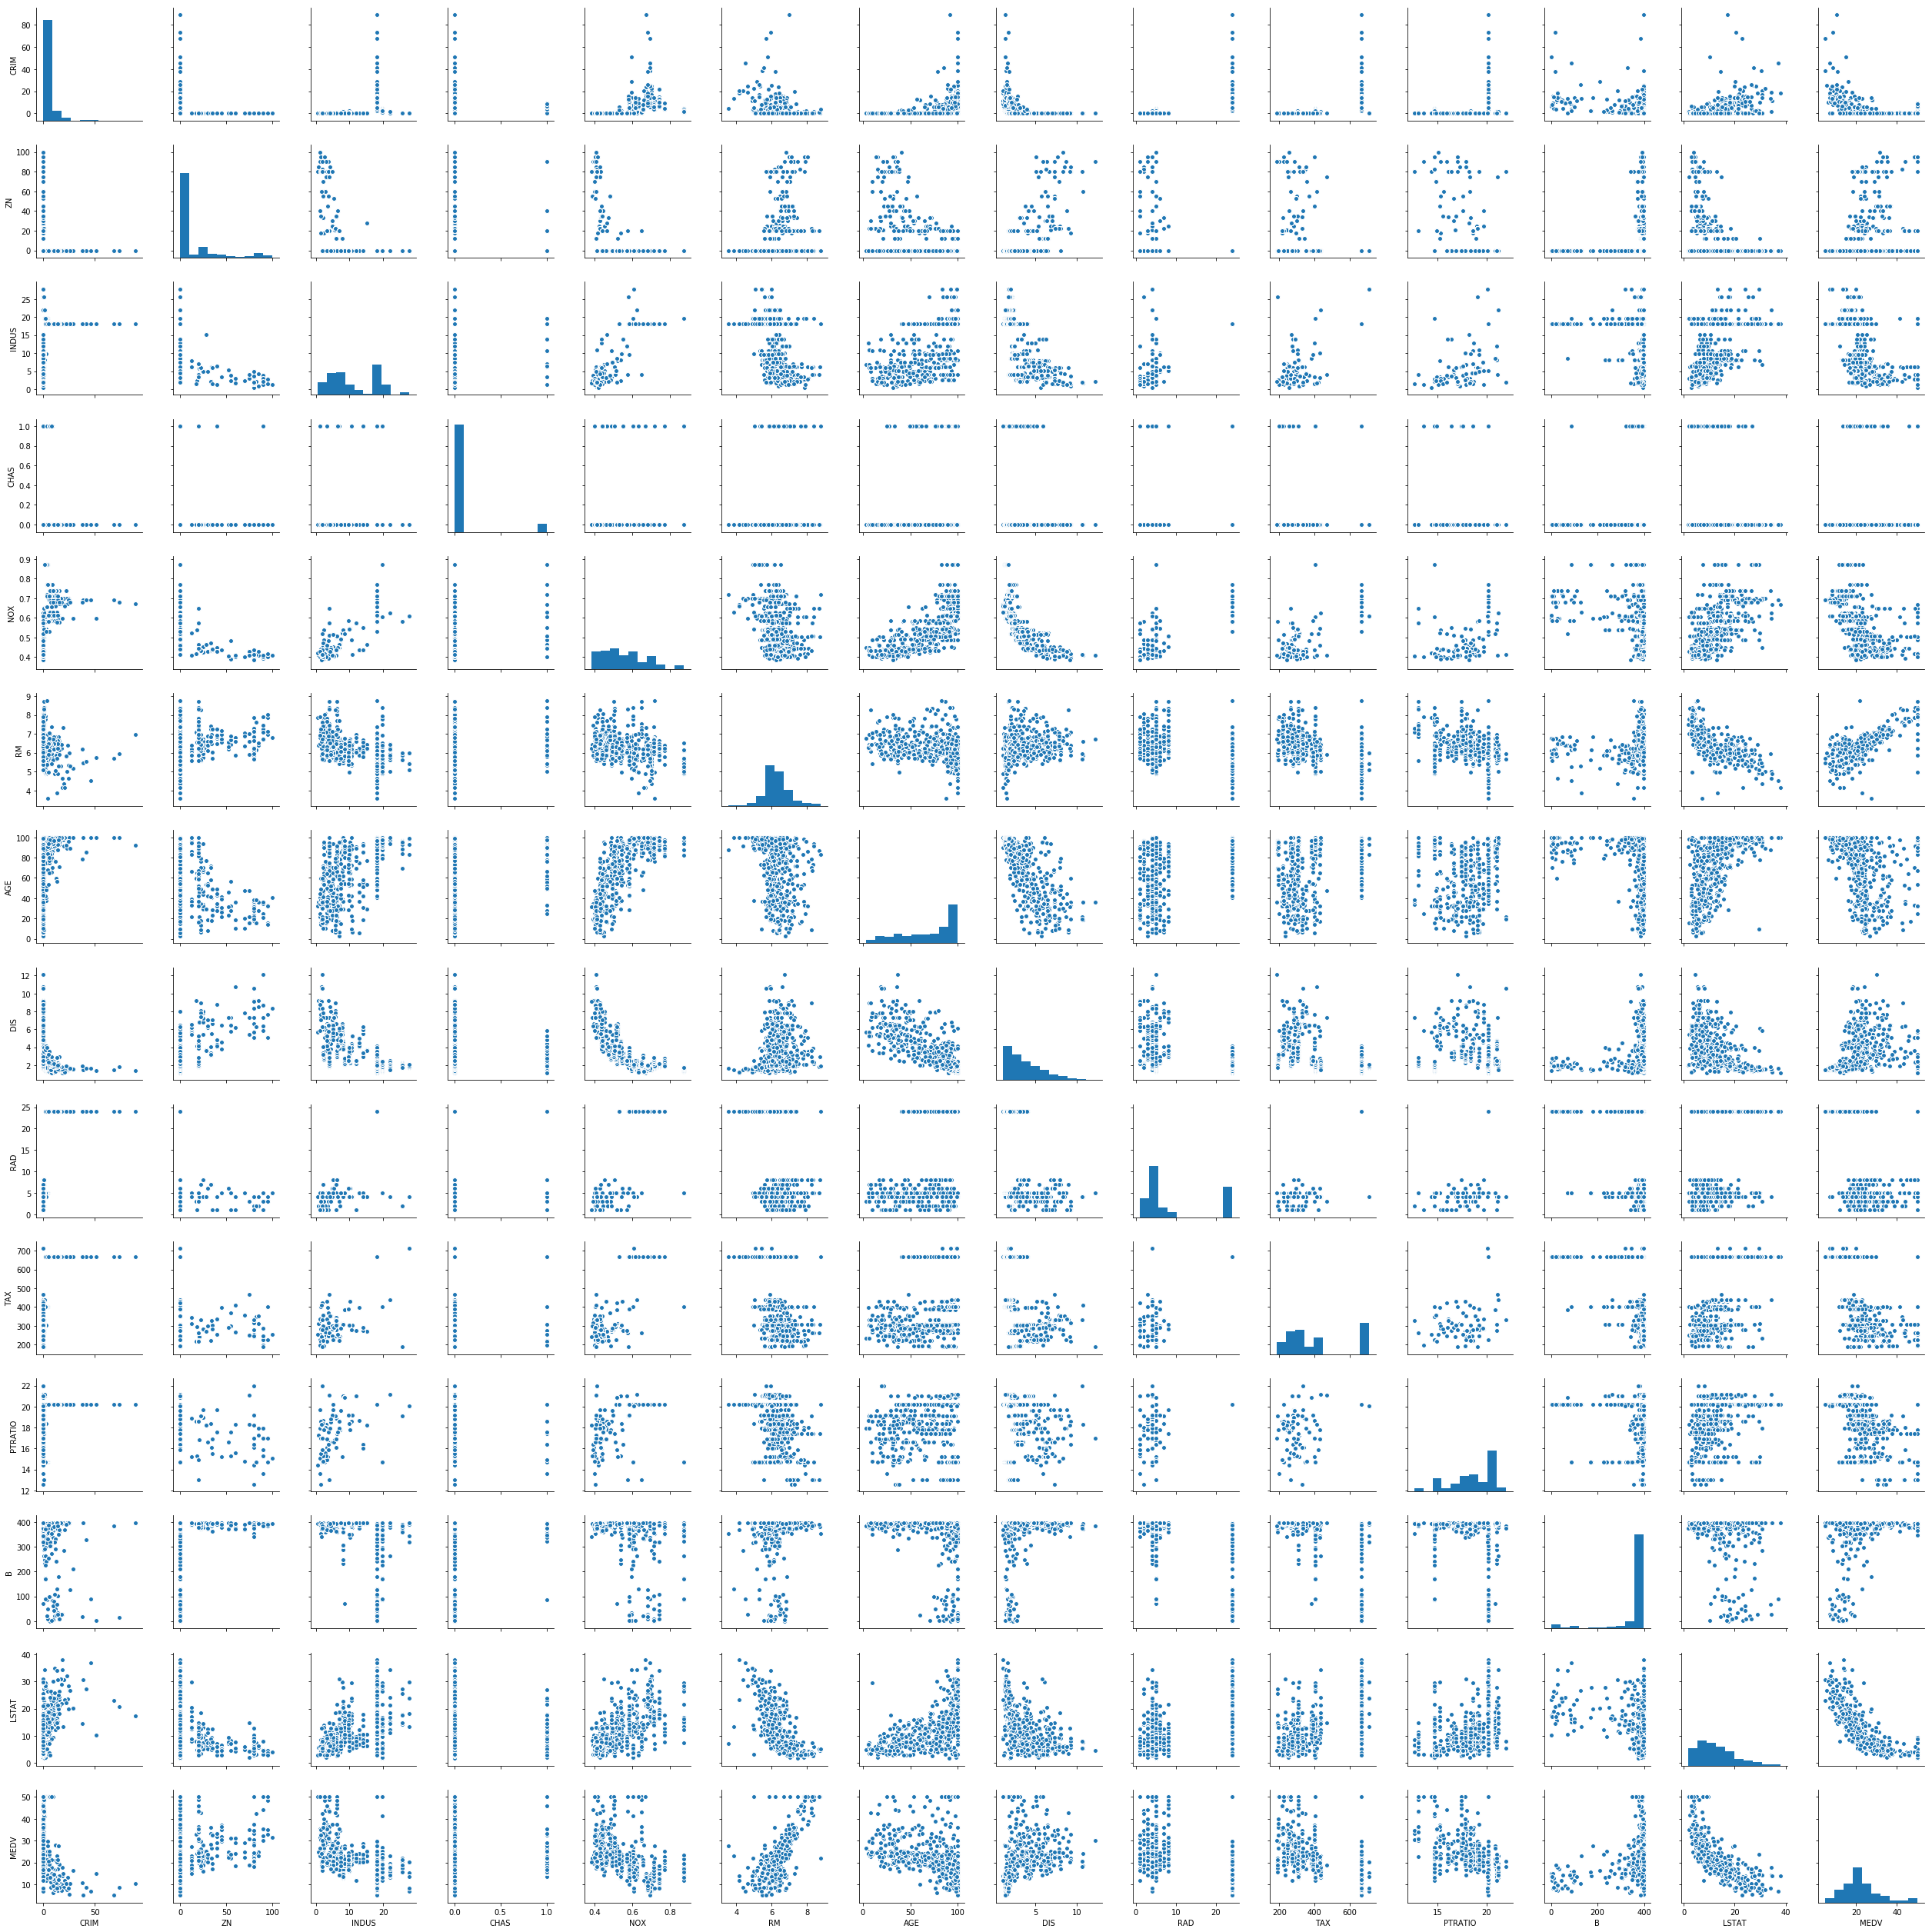

In [10]:
# Visualize using exploratory data analysis (EDA) toolbox
# Create scatterplot matrix using pairplot from seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df,size=2.5)
plt.tight_layout()
plt.show()


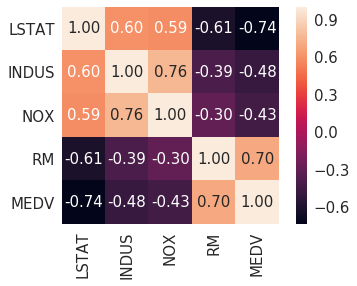

In [17]:
# calculate Pearson's correlation coefficient using numpy corrcoef
# and visualize it using seaborn heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels= cols,
                xticklabels= cols)
plt.show()

In [28]:
# define OLR class
class LinearRegressionGD(object):
    """ Ordinary Linear Regression , Gradient Descent"""
    def __init__(self,eta=0.001,n_iter = 20):
        self.eta = eta
        self.n_iter = 20
        
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:]+= self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() /2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return self.net_input(X)

In [29]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

In [30]:
sns.reset_orig() # resets matplotlib style

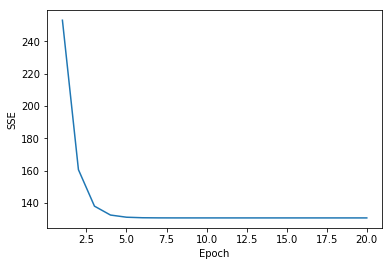

In [31]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [51]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return None
    

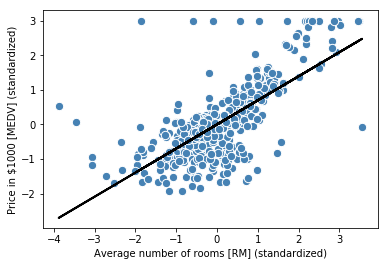

In [52]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000 [MEDV] (standardized)')
plt.show()

# Using scikit-learn

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' % slr.coef_[0])

Slope: 9.102


In [56]:
print('Intercept: %.3f' %slr.intercept_)

Intercept: -34.671


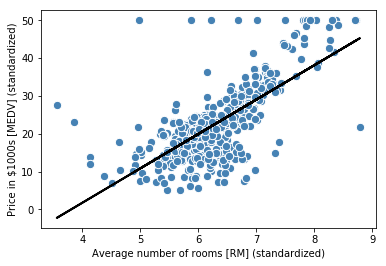

In [57]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

# Fitting a robust regression model using RANdom SAmple Consensus (RANSAC)

In [59]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

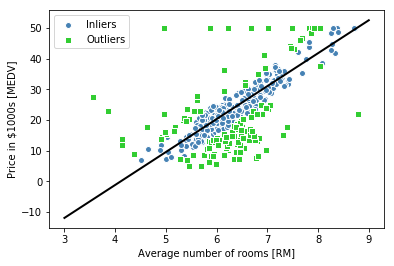

In [60]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
 c='steelblue', edgecolor='white',
 marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
 c='limegreen', edgecolor='white',
 marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()


# Regularized Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [73]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elanet = ElasticNet(alpha=1.0,l1_ratio=0.5)

In [76]:
elanet.fit(X,y)
lasso.fit(X,y)
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

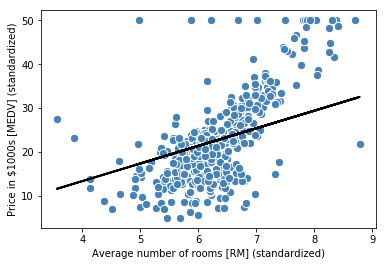

In [77]:
lin_regplot(X, y, elanet)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

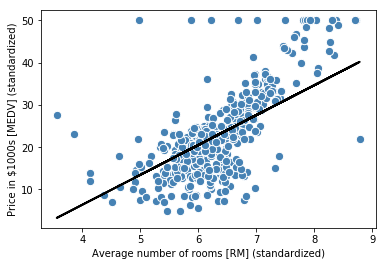

In [78]:
lin_regplot(X, y, lasso)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

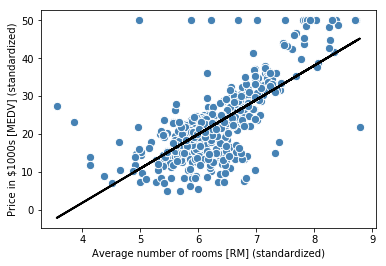

In [79]:
lin_regplot(X, y, ridge)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

# Polynomial Regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures


In [82]:
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
368.0, 396.0, 446.0, 480.0, 586.0])\
 [:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
 342.2, 360.8, 368.0, 391.2, 390.8])


In [83]:
lr=LinearRegression()
pr=LinearRegression()

In [84]:
quadratic=PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [85]:
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:,np.newaxis]
y_lin_fit=lr.predict(X_fit)

In [86]:
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

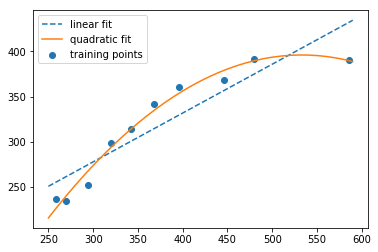

In [87]:
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit,
 label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
 label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

# Dealing with nonlinear relationships using random forests

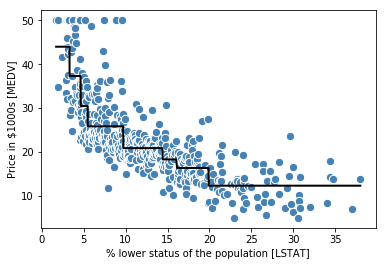

In [88]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()


In [92]:
X.shape

(506, 1)